In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind

#importing the data:
file_path = "COVID-19_CBC_Data.csv"
df  = pd.read_csv(file_path)

df.head()

,Admission_DATE,Discharge_DATE or date of Death,Outcome,Patient Age,Gender,Sample Collection Date,What kind of Treatment provided,Ventilated (Y/N),Red blood cell distribution width,Monocytes(%),White blood cell count,Platelet Count,Lymphocyte Count,Neutrophils Count
0,8/10/2020,8/8/2020,Not Recovered,51,Male,8/10/2020,"antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43
1,7/24/2020,8/5/2020,Not Recovered,65,Female,7/24/2020,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56
2,7/22/2020,8/8/2020,Recovered,32,Male,7/22/2020,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34
3,7/19/2020,8/5/2020,Recovered,36,Female,7/19/2020,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66
4,7/18/2020,8/5/2020,Recovered,46,Male,7/18/2020,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02


In [5]:
# 1 a: completing 2 one tailed t-test: WBC count & platelet count

# extract data:
wbc_data = df["White blood cell count"].dropna()
platelet_data = df["Platelet Count"].dropna()


# defining hypothetical means for one-sample t test:
wbc_hyp_mean = 18
plate_hyp_mean = 288

# one-sample t-tests:
# WBC count:
wbc_ttest = ttest_1samp(wbc_data, wbc_hyp_mean)

# platelet count:
platelet_ttest = ttest_1samp(platelet_data, plate_hyp_mean)

print("WBC T-test:", wbc_ttest)
print("Platelet T-test", platelet_ttest)

WBC T-test: TtestResult(statistic=-5.900058448845066, pvalue=4.7728494952771936e-08, df=102)
Platelet T-test TtestResult(statistic=-12.731285567585466, pvalue=8.503757572608779e-23, df=102)


In [7]:
# 1b: completing two sample, two tailed t-test: WBC count & platelet count

# conduct the two sample, two tail t-test:
t_stat, p_value = stats.ttest_ind(wbc_data, platelet_data, equal_var=False) # Welsh's T-test

# Perform two-sample t-test
two_sample_ttest = ttest_ind(wbc_data, platelet_data, equal_var=False)  # Welch's t-test

print("Two Sample T-test:", two_sample_ttest)


Two Sample T-test: TtestResult(statistic=-35.74362143186209, pvalue=7.129718981226283e-62, df=108.57642792644296)


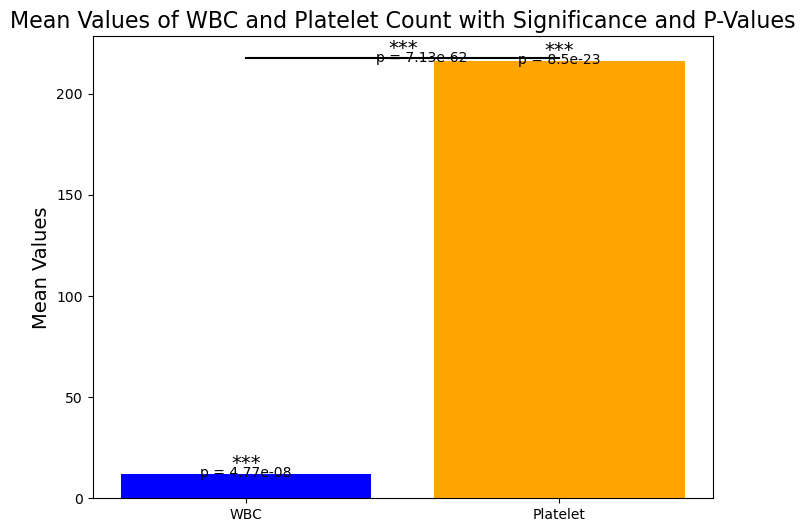

WBC T-test: TtestResult(statistic=-5.900058448845066, pvalue=4.7728494952771936e-08, df=102)
Platelet T-test TtestResult(statistic=-12.731285567585466, pvalue=8.503757572608779e-23, df=102)
Two Sample T-test TtestResult(statistic=-35.74362143186209, pvalue=7.129718981226283e-62, df=108.57642792644296)


In [9]:
# 1c: visualization:

# calculating the means: 
wbc_mean = wbc_data.mean()
platelet_mean = platelet_data.mean()

# setting up the visualization:
fig, ax = plt.subplots(figsize=(8, 6))
bar_positions = [0, 1]
bar_means = [wbc_mean, platelet_mean]
bar_colors = ['blue', 'orange']

bars = ax.bar(bar_positions, bar_means, color=bar_colors, tick_label=["WBC", "Platelet"])

# functions for significance:
# Add significance annotations
def get_significance_asterisks(p_value):
    """Return the appropriate number of asterisks based on the p-value."""
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

def add_significance(ax, x1, x2, y, p_value, text_offset=0.1):
    """Add significance annotation between two bars."""
    stars = get_significance_asterisks(p_value)
    if stars:
        ax.plot([x1, x1, x2, x2], [y, y + text_offset, y + text_offset, y], lw=1.5, color='black')
        ax.text((x1 + x2) * 0.5, y + text_offset + 0.1, stars, ha='center', va='bottom', fontsize=14)
        ax.text(((x1 + x2) * 0.3) +0.26, y - text_offset - 3, f"p = {p_value:.3g}", ha='center', va='bottom', fontsize=10)

# adding the significance for WBC and platelets:
wbc_stars = get_significance_asterisks(wbc_ttest.pvalue)
platelet_stars = get_significance_asterisks(platelet_ttest.pvalue)

if wbc_stars:
    ax.text(0, wbc_mean + 0.5, wbc_stars, ha='center', va='bottom', fontsize=14)
    ax.text(0, wbc_mean - 3, f"p = {wbc_ttest.pvalue:.3g}", ha='center', va='bottom', fontsize=10, color = 'black')
if platelet_stars:
    ax.text(1, platelet_mean + 0.5, platelet_stars, ha='center', va='bottom', fontsize=14)
    ax.text(1, platelet_mean - 3, f"p = {platelet_ttest.pvalue:.3g}", ha='center', va='bottom', fontsize=10, color = 'black')

# Add two-sample t-test significance
add_significance(ax, 0, 1, max(wbc_mean, platelet_mean) + 1, two_sample_ttest.pvalue)

# Customize plot
ax.set_title("Mean Values of WBC and Platelet Count with Significance and P-Values", fontsize=16)
ax.set_ylabel("Mean Values", fontsize=14)
plt.show()

# print the results for reference:
print("WBC T-test:", wbc_ttest)
print("Platelet T-test", platelet_ttest)
print("Two Sample T-test", two_sample_ttest)


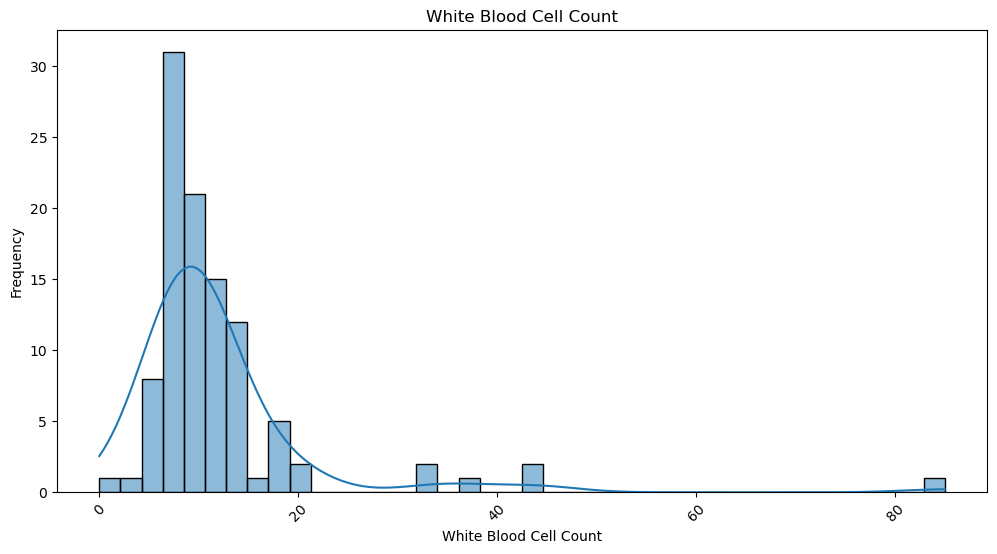

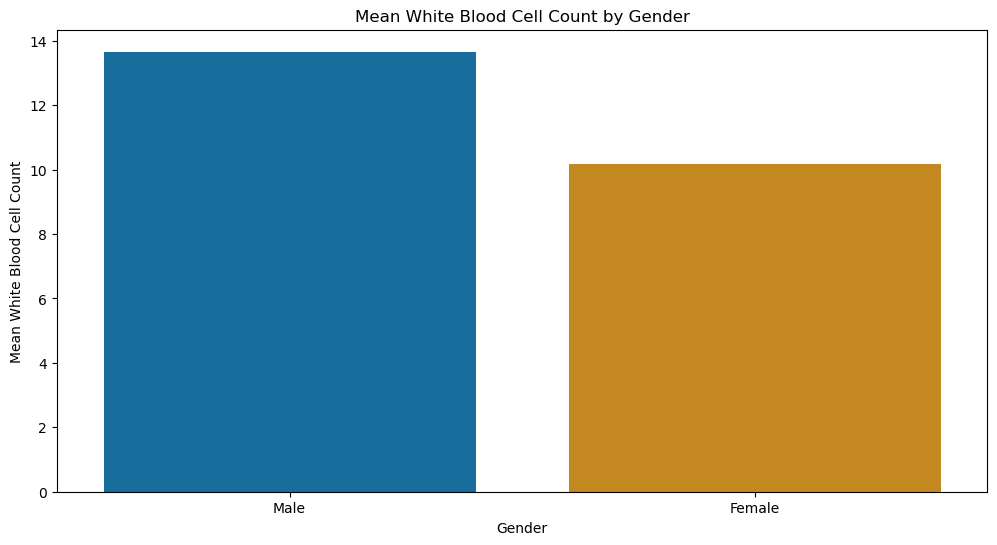

In [11]:
# 2a: one quantitative & one qualitative metric visualization:

# quantitative metric: WBC count:
plt.figure(figsize = (12,6))
sns.histplot(x=df["White blood cell count"], kde = True, bins = 40)
plt.title("White Blood Cell Count")
plt.xlabel("White Blood Cell Count")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# qualitative metric: gender:
# bar plot : mean white blood cell count by gender:
plt.figure(figsize = (12,6))
sns.barplot(x=df["Gender"], y=df["White blood cell count"], errorbar=None, hue=df["Gender"], palette="colorblind")
plt.title("Mean White Blood Cell Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean White Blood Cell Count")
plt.show()


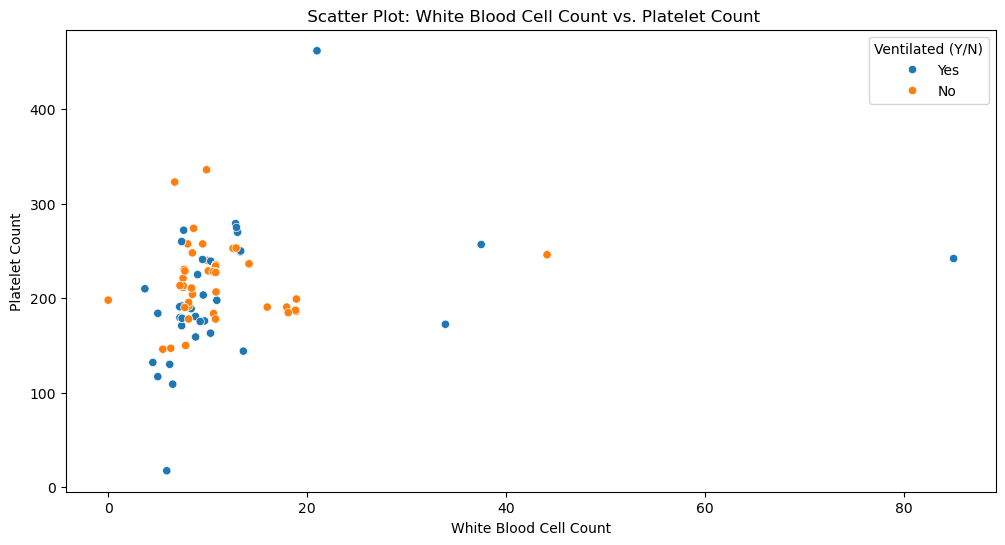

In [13]:
# 2b: visualization with 2 quantitative metrics:

# 2 quantitative metrics - WBC count and platelet count, qualitative - ventilated (Y/N):

# scatter plot: of WBC count vs. platelet count-

plt.figure(figsize = (12,6))
sns.scatterplot(x=df["White blood cell count"], y=df["Platelet Count"], hue=df["Ventilated (Y/N)"])
plt.title(" Scatter Plot: White Blood Cell Count vs. Platelet Count")
plt.xlabel("White Blood Cell Count")
plt.ylabel("Platelet Count")
plt.legend(title="Ventilated (Y/N)")
plt.show()

In [ ]:
# 2c: description:

# The first figure illustrates the frequency and spread of the White Blood Cell count, displayed in a histogram format. 

# The second figure combines qualitative data (gender) with quantitative data (White blood cell count) to display the mean WBC count 
# by gender in a bar graph format. 

# The third figure combines two quantitative measures (platelet count and white blood cell count) with qualitative data (ventilated (Y/N) ) 
# displaying the data in a scatter plot format. 

In [ ]:
# Question 3-

# visualization 1:
# vizualization 2:
# visualization 3:
# visualization 4: